## 描述性统计


##### 位置 (Location)
- **均值 (Mean)**  
  - 广泛使用，容易计算  
  - 缺点：受极端值影响大  
  - 应用：平均收入、平均收益率  
- **中位数 (Median)**  
  - 50% 数据小于此值  
  - 不受极端值影响，适合偏态分布  
  - 应用：房价中位数、收入中位数  
- **众数 (Mode)**  
  - 出现次数最多的数值  
  - 不受极端值影响，但可能不唯一  
  - 应用：最受欢迎产品、最常见分数  

##### 离散程度 (Dispersion)
- **标准差 (Stdev)**：衡量风险和波动性（金融、经济中常见）  
- **方差 (Variance)**：标准差平方，数学处理更方便  
- **极差 (Range)**：最大值 - 最小值，直观但受极端值影响大  
- **四分位差 (IQR)**：Q3 - Q1，更稳健，适合非对称数据  

##### 偏态 (Skewness)
- **左偏 (负偏态)**：尾部在左，例如退休年龄、简单考试成绩  
- **右偏 (正偏态)**：尾部在右，例如收入分布、房价分布  
- 解释数据分布是否对称，帮助选择均值/中位数作为代表值  

##### 描述性统计的计算方法
- 常用库：Numpy、Pandas、SciPy  
- 直接调用 `np.mean`, `np.median`, `np.std`, `np.percentile` 等函数  
- Pandas 提供 `df.describe()`，一次生成统计汇总

In [1]:
import numpy as np, pandas as pd
import scipy.stats as stats

In [ ]:
np.random.seed(123)
N = 1000
xx = np.round(np.random.triangular(0, 60, 80, N), 0).astype(int)
mean = np.mean(xx)
median = np.median(xx)
mode = stats.mode(xx, keepdims=False)[0]
sd = np.std(xx)
var = np.var(xx)
minx = np.min(xx)
maxx = np.max(xx)
rng = maxx - minx
q1 = np.percentile(xx, 25)
q3 = np.percentile(xx, 75)
iqr = q3 - q1
skewness = stats.skew(xx)
cv = sd/mean # Coefficient of variation
print(f"mean={mean}, median={median}, mode={mode}")
print(f"sd ={sd:.4f}, var={var:,.4f}")
print(f"min={minx}, max={maxx}, range={rng}")
print(f"q1 ={q1}, q3 ={q3}, IQR={iqr}")
print(f"skewness = {skewness:.4f}, CV = {cv:.4f}")

### Another simple way to get descriptives
### is to use Pandas describe()
dfstats = pd.DataFrame(xx).describe()
print(dfstats)

## 数据可视化

##### 常见图表 (Common Plots)

- **时间序列 (Time Series)**  
  - 展示趋势、变化速度、范围等  
  - 应用：股价走势、销售趋势  
- **直方图 (Histogram)**  
  - 展示频率分布、形态、偏态、尾部  
  - 适合观察单个变量的分布  
- **分布图 (Distributions)**  
  - 直方图的形态抽象  
  - 可以用数学模型拟合（正态、F分布、二项分布等）  

##### 多总体比较
- **箱线图 (Boxplot)**  
  - 显示 Q1、Q3、中位数、极值、离群点  
  - 适合比较多个群体的差异  
- **小提琴图 (Violin Plot)**  
  - 在箱线图基础上显示分布密度，更直观  

##### 关系探索
- **散点图 (Scatterplot)**  
  - 显示两个变量之间的关系，常用于探索线性关系  
- **成对图 (Pairplot)**  
  - 多变量两两散点图组合  
  - 能快速发现潜在的相关性和模式  



In [ ]:
#时间序列
import numpy as np, pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


data = np.array([25, 21, 27, 31, 26, 15, 24])
plt.figure(figsize=(5,5))
plt.plot(data, color='blue', marker="o", linewidth=1)
plt.title(f"Daily Volume Sales")
plt.show()

yfinfo = yf.Ticker("AAPL")
df = yfinfo.history(start="2024-01-01", end="2024-05-31")
plt.figure(figsize=(5,5))
plt.plot(df.Close, color="orange", linewidth=1)
plt.title("Apple Stock Price (2024)")
plt.show()

In [ ]:
#直方图
data = np.array([25, 21, 27, 31, 26, 15, 24])
plt.figure(figsize=(5,5))
plt.hist(data, color='blue')
plt.title(f"Volume Sales Histogram")
plt.show()

yfinfo = yf.Ticker("AAPL")
df = yfinfo.history(start="2024-01-01", end="2024-05-31")
plt.figure(figsize=(5,5))
plt. hist(df.Close, color="orange")
plt.title("Apple Stock Histogram (2024) ")
plt.show()

In [ ]:
#分布图
# Discrete Distribution
np.random.seed(123)
data = np.random.binomial(50, 0.85, 2000)
plt.figure(figsize=(5,5))
plt.hist(data, color='skyblue')
plt.title(f"Discrete Distribution")
plt.show()


xs = max(0, np.min(data)-10)
xe = np.max(data)+20
N = 200
Fig = plt.figure(figsize=(5,5))
x = np.linspace(xs, xe, num=N)

# Normal Distribution
popmean = np.round(np.mean(data),1)
popsd = np.round(np.std(data), 1)
pdf = stats.norm(popmean, popsd).pdf(x)
plt.fill_between(x, pdf, alpha=0.2, color='limegreen')
plt.plot(x, pdf, color='limegreen')
plt.title(f"Normal Distribution (mean={popmean:.1f}, sd={popsd:.1f})")
plt.show()

# F Distribution    
fig = plt.figure(figsize=(5,5))
x = np.linspace(0, 6, num=N)
pdf = stats.f(dfn=5, dfd=10).pdf(x)
plt.fill_between(x, pdf, alpha=0.2, color='orange')
plt.plot(x, pdf, color='orange')
plt.title(f"F Distribution (df1=5, df2=10)")
plt.show()

In [ ]:
#箱线图

np.random.seed(123)
## Gen 3 pops
n = 100
df = pd.DataFrame([
 np.random.triangular(20, 50, 90, n),
 np.random.triangular(35, 40, 80, n),
 np.random.triangular(10, 70, 120, n),
 ]).T
df.columns = ["Pop1", "Pop2", "Pop3"]
fig = plt.figure(figsize=(6,6))
df.plot.box(ax=fig.gca())
plt.show()


def getPrices(listSyms):
    prices = []
    for sym in listSyms:
        yfinfo = yf.Ticker(sym)
        df = yfinfo.history(start="2024-01-01", end="2024-05-31")
        prices.append(df.Close.tolist())
    df = pd.DataFrame(prices).T  # 先转置
    df.columns = listSyms        # 再赋列名
    return df

df = getPrices(["AAPL", "MSFT", "NVDA",  "META", "GOOG"])
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.violinplot(dataset = df)

In [ ]:
# 散点图
data = np.array([[10,20,30,40,50],[12,18,34,42,45]])
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(data[0], data[1], linestyle="", color="orange", marker="o", markersize=15)
plt.show()

def getPrices(listSyms):
    prices = []
    for sym in listSyms:
        yfinfo = yf.Ticker(sym)
        df = yfinfo.history(start="2024-01-01",end="2024-05-31")
        prices.append(df.Close.tolist())

    df = pd.DataFrame(prices).T
    df.columns=listSyms
    return df
#
df = getPrices(["AAPL", "MSFT", "META","TSLA", "NVDA", "GOOG"])
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df.NVDA, df.TSLA, linestyle="", color="red",
 marker="o", markersize=5)
plt.title("Tesla vs Nvidia")
plt.show()

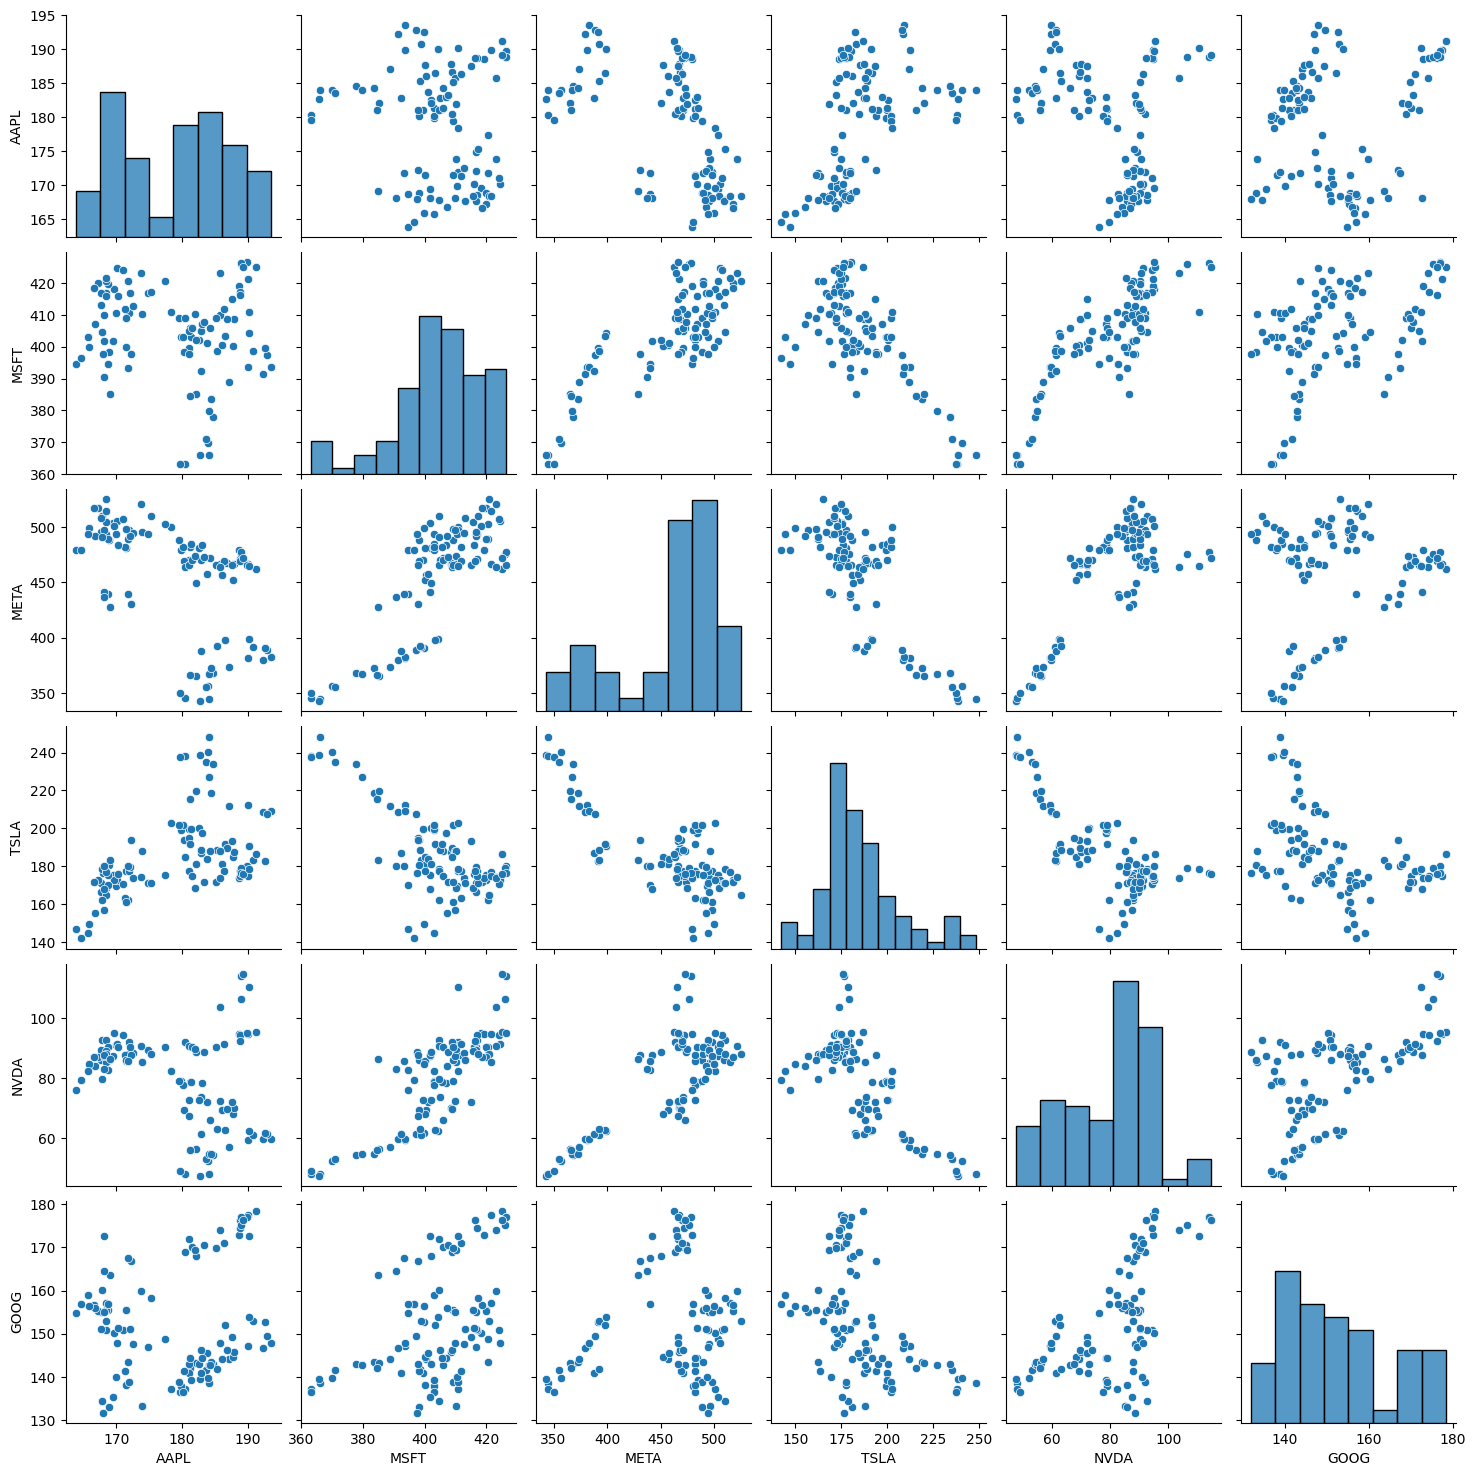

In [ ]:
# Pairplot（成对关系图）
import numpy as np, pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
df = getPrices(["AAPL", "MSFT", "META", "TSLA",  "NVDA", "GOOG"])
sns.pairplot(df)
plt.show()

## 参数检验（关注总体均值）

##### 1. 基本概念
- **Population Mean (μ)**：关注总体均值  
- **无法完全获取总体信息** → 使用：
  - 置信区间 (Confidence Interval)  
  - 假设检验 (Hypothesis Testing)  

##### 2. 参数假设 (Parametric Assumptions)
- 假设数据服从正态分布  
- 实际数据不一定严格正态，但常近似为正态  
- 若假设成立 → 可使用丰富的统计方法  

##### 3. 置信区间 (Confidence Interval)
- 基于样本均值、标准差、样本量计算  
- 例如：95% CI 表示总体均值在区间内的置信程度  

##### 4. 假设检验 (Hypothesis Testing)
- **1 个总体均值检验**  
  - 单样本 t 检验 (One-sample t-test)  
- **2 个总体均值检验**  
  - 配对样本 t 检验 (Paired t-test)  
  - 独立样本 t 检验 (Unpaired t-test)  
- **3 个及以上总体均值检验**  
  - 单因素方差分析 (ANOVA)  

##### 5. 检验逻辑
- 设定原假设 H₀ 与备择假设 H₁  
- 根据 p 值判断是否拒绝 H₀  
- 显著性水平 α 通常取 0.05  

![我的图片](参数检验.png)



In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import scipy.stats as stats

#置信区间
txtdata = """
36, 58,21, 18, 38, 32, 43, 27
"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")
data = df.values.ravel()
n = len(data)
rv = stats.t(df=n-1)
mean = np.mean(data)
sd = np.std(data)
CL = 95
t = np.abs(rv.ppf((1-CL/100)/2))
stderr = sd/np.sqrt(n)
tol = t * stderr
LL = mean - tol
HL = mean + tol
print(f"A {CL}% confidence interval is [ {LL:,.4f}, {HL:,.4f} ]")

In [ ]:
#1个总体均值检验-单样本 t 检验 (One-sample t-test)  
txtdata = """36, 58,21, 18, 38, 32, 43, 27"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")
data = df.values.ravel()
n = len(data)
mu0 = 35
model = stats.ttest_1samp(data, popmean=mu0, alternative="greater")
pval = model.pvalue
print(f"pval={pval:,.4f}")

In [ ]:
#2 个总体均值检验——配对样本 t 检验 (Paired t-test)  
txtdata = """
36, 58, 21, 18, 38, 32, 43, 27
35, 47, 32, 29, 33, 27, 36, 41
"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")
data1 = df.values[0]
data2 = df.values[1]
n = len(data1)
mu0 = 0
model = stats.ttest_rel(data1, data2, alternative="two-sided")
pval = model.pvalue
print(f"pval={pval:,.4f}")

In [ ]:
#2 个总体均值检验**  - 独立样本 t 检验 (Unpaired t-test) 
txtdata= """
36, 58, 21, 18, 38, 32, 43, 27
35, 47, 32, 29, 33, 27, 36, 41
"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")
data1 = df.values[0]
data2 = df.values[1]
n = len(data1)
mu0 = 0
model = stats.ttest_ind(data1, data2, alternative="less")
pval = model.pvalue
print(f"pval={pval:,.4f}")

In [ ]:
#3 个及以上总体均值检验- 单因素方差分析 (ANOVA)  
## Returns list of column data without nan
def nanDataByCol(data):
    nndata = data[True ^ np.isnan(data)]
    return nndata

txtdata = """
36, 58, 21, 18, 38, 32, 43, 27
25, 27, 12, 15, 27, 19
12, 9, 11, 19, 13
"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")
data1 = nanDataByCol(df.values[0])
data2 = nanDataByCol(df.values[1])
data3 = nanDataByCol(df.values[2])
model = stats.f_oneway(data1, data2, data3)
pval = model.pvalue
print(f"pval={pval:,.4f} ANOVA")

## 非参数检验（关注总体中位数）

##### 1. 为什么使用非参数检验？
- 数据可能：
  - 不服从正态分布（偏态、双峰）  
  - 方差不齐  
  - 不独立  
- 均值 μ 不再合适 → 使用中位数 η  

##### 2. Population Median (η)
- 中位数定义：50% 数据小于 η  
- 更稳健，适合非正态分布数据  

##### 3. 非参数检验方法
- **1 个总体**：Wilcoxon Signed Rank Test  
- **2 个总体**：  
  - 配对：Wilcoxon Signed Rank Test  
  - 独立：Mann-Whitney U Test  
- **3 个及以上总体**：Kruskal-Wallis Test  

##### 4. 假设检验逻辑
- 与参数检验类似，使用中位数 η  
- 根据 p 值与显著性水平 α 判断  
![我的图片](非参数检验.png)



##### 5. 检验假设条件 (Assumptions Map)
- **正态性**：  
  - Shapiro Test (n < 50)  
  - Kolmogorov-Smirnov Test (n ≥ 50)  
- **方差齐性**：  
  - Bartlett Test (需正态性)  
  - Levene Test (不要求正态性)  
- **独立性**：  
  - Chi-square Test  
---

##### 对比总结

| 方面 | 参数检验  | 非参数检验  |
|------|-----------|-------------|
| 统计量 | 均值 (μ) | 中位数 (η) |
| 假设前提 | 正态分布、方差齐性 | 不要求正态、稳健 |
| 单总体 | One-sample t-test | Wilcoxon Signed Rank Test |
| 两总体 | t-test (paired/unpaired) | Wilcoxon (paired) / Mann-Whitney U |
| 多总体 | ANOVA | Kruskal-Wallis |

![我的图片](检验前提.png)


In [ ]:
import numpy as np, pandas as pd
import scipy.stats as stats
from io import StringIO
## Returns list of column data without nan
def nanDataByCol(data):
 nndata = data[True ^ np.isnan(data)]
 return nndata
#

##1\2\3 个及以上总体中位数检验- 非参数检验
txtdata = """
36, 58, 21, 18, 38, 32, 43, 27
25, 27, 12, 15, 27, 19
22, 33, 18, 12, 24, 27
12, 9, 11, 19, 13
"""
df = pd.read_table(StringIO(txtdata), header=None, sep=",")

data1 = nanDataByCol(df.values[0])
data2 = nanDataByCol(df.values[1])
data3 = nanDataByCol(df.values[2])
data4 = nanDataByCol(df.values[3]) 
mu0 = 25
model = stats.wilcoxon(data1-mu0,alternative="greater", method="exact",nan_policy="omit")
pval = model.pvalue
print(f"pval={pval:,.4f} Wilcoxon Signed Rank Test")
###
model = stats.wilcoxon(data2, data3, alternative="greater", method="exact", nan_policy="omit")
pval = model.pvalue
print(f"pval={pval:,.4f} Wilcoxon Paired Test")
###
model = stats.mannwhitneyu(data1, data2,alternative="less", method="exact",nan_policy="omit")
pval = model.pvalue
print(f"pval={pval:,.4f} Mann-Whitney U-Test")
###
model = stats.kruskal(data1, data2, data3, data4, nan_policy="omit")
pval = model.pvalue
print(f"pval={pval:,.4f} Krsukal Wallis Test")

In [ ]:
##前提检验： 正态性检验
data = np.array([20, 18, 23, 32, 30, 29, 5, 15, 42])
mean = np.mean(data)
sd = np.std(data)
n = len(data)
### Shapiro normality test
ts, pval = stats.shapiro(data)
print(f"Shapiro test against best fitting normal\n\
p-val ={pval:,.6f}")
### Kolmogorov-Smirnov Test
ts, pval = stats.kstest(data, stats.norm(mean,sd).cdf)
print(f"Kolmogorov-Smirnov normality test against N({mean:.1f}, {sd:.1f}^2)\n\
p-val ={pval:,.6f}")
### Kolmogorov-Smirnov Test
mean2 = 40
sd2 = 8
ts, pval = stats.kstest(data, stats.norm(mean2,sd2).cdf)
print(f"Kolmogorov-Smirnov normality test against ({mean2:.1f}, {sd:.1f}^2)\n\
      p-val ={pval:,.6f}")

In [ ]:
###前提检验： 方差齐性检验

def nanDataByCol(data):
 """Returns list of column data without nan"""
 nndata = data[True ^ np.isnan(data)]
 return nndata
#
nan = np.nan
obs = np.array([[47,30,28,40,49,35,72,47,nan,nan,nan,nan],
 [44,42,40,50,43,28,42,50,35,35,nan,nan],
 [46,46,49,55,52,48,52,40,41,37,39,nan],
 [66,71,59,59,53,69,66,59,84,70,68,66]])
df=pd.DataFrame(obs).T
colvecs = [ nanDataByCol(df.iloc[:,j]) for j in range(ncol) ]
### Assume normality for all 4 populations
model = stats.bartlett(*colvecs)
ts, pval = model
print(f"Bartlett test:: pval={pval:,.6f}")
### Non-parametric Levene's Test
model = stats.levene(*colvecs)
ts, pval = model
print(f"Levene test:: pval={pval:,.6f}")

In [ ]:
##前提检验： 独立性检验（卡方检验）

obs = np.array([[15, 25, 35], [30, 18, 9 ]],dtype="int64")
chistat, pval, dof, exp_freq = stats.chi2_contingency(obs)
print(f"pval={pval:,.4g}")
print(f"degree of freedom={dof}")
print("expected freq=\n", exp_freq)
print("\n\n")

## 概率(贝叶斯定理)

##### 1. 概率（Probability）
**定义：**
```
P(A) = 事件 A 的发生次数 / 总试验次数
```
- 样本空间：所有可能的事件集合  
- 计算方式：可基于频率、面积、计数

**注意事项：**
- 样本空间需清晰定义
- 重复事件必须计入统计

##### 2. 条件概率（Conditional Probability）
**定义：**
```
P(A|B) = P(A ∩ B) / P(B)
```

- 表示在 已知事件B 已经发生的前提下，事件A 发生的概率
- 强调：**条件写在分母，交集写在分子（不要被“条件“这个词吓到）**

##### 📊 应用：列联表法（contingency table）
```python
p_y_given_a = conttbl.A.Y / conttbl.A.sum()
p_x_given_b = conttbl.B.X / conttbl.B.sum()
```

##### 3. 贝叶斯定理（Bayes’ Theorem）
**公式：**
```
P(B|A) = [P(A|B) * P(B)] / P(A)
```

**解释：**
- 贝叶斯定理让我们能 **反向推理未知的概率**
- 将“观察数据”与“先验知识”结合，更新为“后验概率”
- 用于反转条件概率，能够从已知的因果方向（如test—>disease）推出逆向概率（disease—>test）
- 非常实用：当正向难以测量，反向容易获取时，可以倒推出未知量

**应用场景：**
- 医疗检测（假阴性、假阳性）
- 商业风险评估
- 信用评分与推荐系统

##### 4. 贝叶斯定理计算步骤（使用 NumPy 矩阵）
```python
import numpy as np

prior = np.array([0.9, 0.1])
perfMat = np.array([
    [0.7, 0.3],
    [0.2, 0.8]
])

def bayes(prior, perfMat):
    joint = perfMat * prior
    posterior = joint / joint.sum(axis=1, keepdims=True)
    return posterior

posterior = bayes(prior, perfMat)
```
计算流程：
1. 先验概率 × 条件概率 → 联合概率  
2. 每列归一化 → 得到后验概率  

##### 5. 贝叶斯定理应用案例
##### 🎓 案例一：高收入家庭 vs 成功概率
![图片](贝叶斯-应用举例.png)
已知：
- 成功概率：30%
- 成功者中有高收入父母：65%
- 非成功者中有高收入父母：40%

目标：
> 若某人父母是高收入群体，预测其未来成功的概率是多少？
结果：
```
P(成功 | 高收入父母) ≈ 41%
```
##### 🧪 案例二：Covid 快速检测结果的解读
假设：
- 感染率（先验）：30%
- 快测敏感性（真阳性率）：75%
- 特异性（真阴性率）：89%

问题：
> 如果检测为阴性，这个人真的没感染吗？

计算结果：
```
P(感染 | 阴性) ≈ 10.75%
```

---
##### ✅ 总结对比表

| 概念             | 核心公式                                   | 应用场景                     |
|------------------|--------------------------------------------|------------------------------|
| 概率             | `P(A) = count(A) / total`                  | 表征不确定性事件的可能性     |
| 条件概率         | `P(A|B) = P(A ∩ B) / P(B)`                 | 推断事件在特定条件下的概率   |
| 贝叶斯定理       | `P(B|A) = (P(A|B) * P(B)) / P(A)`          | 反向推理，医学预测，信用评分 |
| 列联表计算方法   | Pandas 的 `.loc`, `.sum()` 操作           | 事件交叉分析，边际概率估计   |


##### 贝叶斯就是：先有判断（先验），然后用数据去更新它（得到后验）（先验*证据—>后验）
- 贝叶斯是一种用新证据去更新原有信念的方法，先是我们原来的估计（先验概率），再用观测数据（似然）修正它，最后得到更新后的概率（后验概率）
- 就像你原本觉得明天股市涨的概率是 60%，但临收盘前出了个利好消息，用贝叶斯一算，可能更新为 75%。
- 贝叶斯方法可将**历史数据的统计结果（似然）与专家观点（先验）**结合，得出更加稳健的投资组合权重

##### 📘 什么是似然（Likelihood）

##### ✅ 简单定义：
> **似然是：在某个假设成立的前提下，观察到当前数据的可能性有多大。**

##### 🔁 和「概率」的区别：

| 名称     | 是什么？                                  | 举例                                                    |
|----------|-------------------------------------------|----------------------------------------------------------|
| **概率** | 已知模型，问事件发生的可能性是多少        | “掷骰子出 6 的概率是 1/6”                               |
| **似然** | 已知结果，反推哪个模型更可能导致它发生    | “如果连续掷出 6、6、5，那么哪个骰子模型更合理？”       |

##### 🎯 通俗理解：

- **概率**是：知道规则，推结果 → 正向思考  
- **似然**是：知道结果，找规则 → 反向推理

你可以这样记：

> 概率问的是：“**这个结果**在**这个模型**下出现的可能性是多少？”  
> 似然问的是：“**这个结果**更像是哪种**模型**生成的？”

##### 🧠 在贝叶斯定理中的角色：

**公式：**

`P(假设 | 数据) = [P(数据 | 假设) × P(假设)] / P(数据)`

其中：
- `P(假设)`：先验概率  
- `P(数据 | 假设)`：**似然**  
- `P(假设 | 数据)`：后验概率  

##### 📌 面试回答模板：

> 似然表示的是：**在一个假设前提下，当前观察到的数据出现的可能性有多大。**  
> 在贝叶斯定理中，它衡量“数据有多支持这个假设”。

##### 💹 金融应用举例：
- 在高频交易中，如果一个模型预测股价会上涨，而你真的看到涨了，那么这个涨价事件对这个模型的「似然」就很高。  
- 贝叶斯框架可以根据这种“似然”，不断修正你对模型参数或信号的判断。

##### 贝叶斯在金融量化中的应用：交易信号建模
##### 场景设定

你有一个交易信号模型，它会输出“看涨”信号。你想知道：
**如果模型发出了“看涨”信号，市场真的会上涨的概率有多大**

##### 已知条件
- 市场上涨的先验概率：
  - P(上涨) = 0.3
- 模型条件概率：
  - P(信号=看涨 | 市场上涨) = 0.8 （真阳性率）
  - P(信号=看涨 | 市场不涨) = 0.2（假阳性率）
##### 目标
- 计算后验概率：
- P(市场上涨 | 信号=看涨)
##### 贝叶斯公式
- P(上涨 | 信号) = [P(信号 | 上涨) × P(上涨)] / P(信号)

In [ ]:
# 条件概率

import numpy as np, pandas as pd

conttbl = pd.DataFrame([ [ 4, 8,16],[12, 5,15] ],dtype=np.float64, index=list("XY"),columns=list("ABC"))
print(conttbl)
tot = conttbl.sum().sum()
conttbl /= tot
print(conttbl)
### P(Y|A)
p_y_bar_a = conttbl.A.Y / conttbl.A.sum()
print(f"P(Y|A) = {p_y_bar_a:.4f}")
### P(X|B)
p_x_bar_b = conttbl.B.X / conttbl.B.sum()
print(f"P(X|B) = {p_x_bar_b:.4f}")
### P(C|X)
p_c_bar_x = conttbl.loc["X"].C / conttbl.loc["X"].sum()
print(f"P(C|X) = {p_c_bar_x:.4f}")
### P( (XA or XC) | (A or B) )
sub = conttbl.loc[:,["A","B"]]
p = sub.loc["X","A"] / sub.sum().sum()
print(f"P( (XA or XC) | (A or B) ) = {p:.4f}")

In [ ]:
# 贝叶斯定理
import numpy as np
def bayes(prior, perfMat):
    prior = prior.ravel()
    n = prior.shape[0]
    m = perfMat.shape[1]
    andMat = np.zeros((n, m))
    for i in range(n):
        andMat[i,:] = prior[i] * perfMat[i,:]
        # ## Column-sum
        tots = np.sum(andMat, axis=0)
        posterior = andMat.copy()
    for j in range(m):
        posterior[:,j] /= tots[j]
    #
    return posterior

prior = np.array([0.9, 0.1])
perfMat = np.array([[0.7, 0.3], [0.2, 0.8]])
posterior = bayes(prior, perfMat)
print(f"posterior = \n{posterior}")